<a href="https://colab.research.google.com/github/mordor-ai/deep_learning/blob/master/DEEP_LEARNING_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# permet de savoir si on a une cartegraphique ou pas

!nvidia-smi

Mon Feb  3 14:39:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import numpy as np
import tensorflow as tf
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels , dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels ,dtype=np.int32)

print (train_data.shape)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-u


1. A􏰅cher une image ainsi que son label. Adapter les placeholders.
2. La fonction de perte est-elle encore adaptée ? Modi􏰄er là en prenant en compte le type des
données.
3. Répetez l'apprentissage dé􏰄ni dans la question 8 de l'exercice 1.
2
3
4
5
1
4. Modi􏰄er la fonction d'activation en une sigmoid. Dans les scénarios utilisant 4 couches de
neurones comparez l'évolution de la fonction de perte et des performances en fonction du type
d'activation.
5. Le data augmentation consiste à accroître la taille de la base d'apprentissage de manière
synthétique en modi􏰄ant les données d'entrées. Proposez et implémentez un type ou plusieurs
types de data augmentation. Que constatez-vous ?
6. Comparez les temps d'apprentissage avec et sans carte graphique.
7. Sur la couche d'entrée et une couche cachée, calculez les histogrammes d'activation de dix
neurones aléatoires lorsque l'on passe en entrée du réseau les images d'un label donné. Dans


In [0]:
train_labels.shape
train_labels[1]

3

i=0 l=7


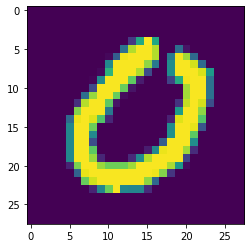

i=1 l=3


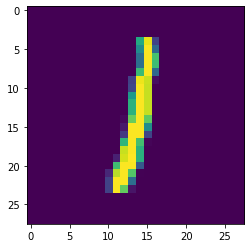

i=2 l=4


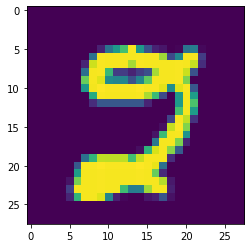

i=3 l=6


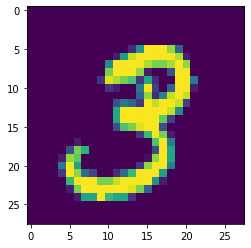

i=4 l=1


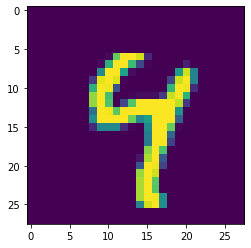

i=5 l=8


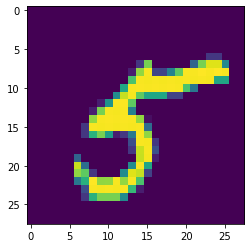

i=6 l=1


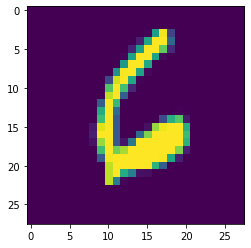

i=7 l=0


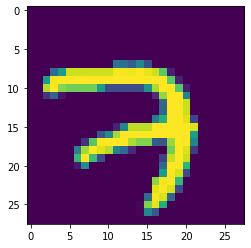

i=8 l=9


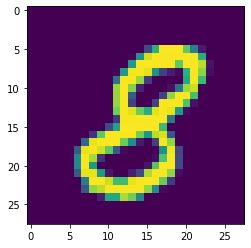

i=9 l=8


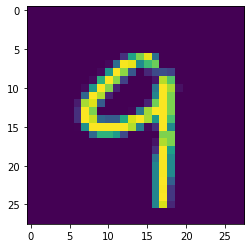

In [0]:
#A􏰅fficher une image ainsi que son label. Adapter les placeholders.
import matplotlib.pyplot as plt
for i in range (0,10):
  im = np.reshape(train_data[train_labels==i,:][0],(28,28))
  plt.imshow(im)
  print("i="+str(i)+" l="+str(train_labels[i]))
  plt.show()
       

In [0]:
# 28 :  dimension de l'image
# None = taille du batch
# declaration des datas
data = tf.placeholder(tf.float32,shape=(None,28*28))


In [0]:
# declaration des labels
# dimension des classes de labels
label = tf.placeholder(tf.float32, shape=(None,10))

In [0]:
# declaration de la première variable
def weight_variable(shape):
  initial =  tf.truncated_normal(shape,stddev=0.01)
  return tf.Variable(initial)

def bias_variable(shape):
  #on n'utilise pas une fonction ReLU => 0.0
  initial=  tf.constant(0.0,shape=shape)
  return tf.Variable(initial)

# poids
W_fc1 = weight_variable([28*28,128] )
# biais 
b_fc1 = bias_variable([128])

In [0]:
# création de la 1ere couche
p1 = tf.nn.tanh(tf.matmul(data,W_fc1)+ b_fc1)

In [0]:
# création de la deuxième couche de neurones
#
# poids
W_fc2 = weight_variable([128,64] )
# biais 
b_fc2 = bias_variable([64])

p2 = tf.nn.tanh(tf.matmul(p1,W_fc2)+ b_fc2)


In [0]:
# création de la troisième couche de neurones
#
# poids
W_fc3 = weight_variable([64,10] )
# biais 
b_fc3 = bias_variable([10])
# pas de fonction d'activation 
p3 = tf.matmul(p2,W_fc3)+ b_fc3

In [0]:
# cross entropie
softmax_loss =  tf.reduce_mean( 
      tf.nn.softmax_cross_entropy_with_logits(
          labels = label, 
          logits=p3)
    )

In [0]:
# on definit le sgb
optimizer  = tf.train.GradientDescentOptimizer(0.01)
train= optimizer.minimize(softmax_loss)

In [0]:
# decalration de la session
sess=  tf.Session()
# initialisationd es varaibvles
init =  tf.initialize_all_variables()
sess.run(init)


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [0]:

# vector 42 X (28X28)

# Labels 42 X (10)

import random
def getTrainBatch (size):
  z =  np.zeros((size,28*28))
  l = np.zeros((size,10))
  for i in range(0, size):
    r = random.randint(0,train_data.shape[0]-1)
    z[i] = train_data[r]
    l[i,train_labels[r]] =1
  return z, l




In [0]:
for i  in range(10000):
  im, l =  getTrainBatch(42)
  #tmp = sess.run(p3, feed_dict={data:im, label:l})
  loss, _ =  sess.run([softmax_loss,train],feed_dict={data:im, label:l})
  
  if i%100==00:
    #print(loss)
    pred = sess.run(p3, feed_dict={data:eval_data})
    argmax =  np.argmax(pred, axis=1)
   # print(argmax)
    print (str(i)+ " => " + str(np.sum(argmax==eval_labels)/float(eval_labels.shape[0])))
    
 #argmax(vecture de la dernire couche  ) => comprae à  la réalité trerrain donne l'accuracy

0 => 0.9462
100 => 0.9466
200 => 0.9466
300 => 0.9458
400 => 0.9483
500 => 0.9477
600 => 0.9457
700 => 0.9469
800 => 0.9487
900 => 0.9476
1000 => 0.9479
1100 => 0.9486
1200 => 0.9482
1300 => 0.9478
1400 => 0.9482
1500 => 0.9492
1600 => 0.9488
1700 => 0.9491
1800 => 0.9491
1900 => 0.9505
2000 => 0.9504
2100 => 0.9497
2200 => 0.9508
2300 => 0.9506
2400 => 0.9503
2500 => 0.9506
2600 => 0.9514
2700 => 0.9505
2800 => 0.9504
2900 => 0.9516
3000 => 0.9519
3100 => 0.9508
3200 => 0.9511
3300 => 0.9531
3400 => 0.9519
3500 => 0.9513
3600 => 0.9518
3700 => 0.9535
3800 => 0.9522
3900 => 0.9521
4000 => 0.9538
4100 => 0.953
4200 => 0.9533
4300 => 0.9533
4400 => 0.954
4500 => 0.9541
4600 => 0.9546
4700 => 0.9524
4800 => 0.9545
4900 => 0.9543
5000 => 0.9547
5100 => 0.954
5200 => 0.9547
5300 => 0.9545
5400 => 0.9545
5500 => 0.954
5600 => 0.9549
5700 => 0.9556
5800 => 0.9554
5900 => 0.9561
6000 => 0.9572
6100 => 0.9569
6200 => 0.9566
6300 => 0.9559
6400 => 0.9573
6500 => 0.9564
6600 => 0.9567
6700 => 0.9

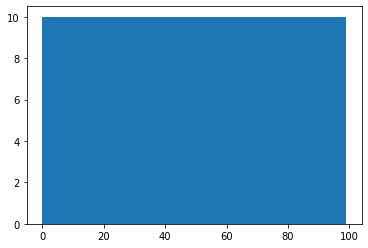

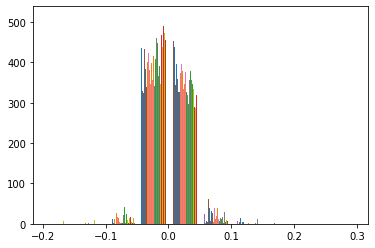

In [0]:
# todo  afficher les poids
#plt.hist(np.arange(0,100), bins=10)
#plt.show()
W = sess.run(W_fc1)
# todo afficher un histogramme de W
plt.hist(W, bins=10)
plt.show()
